In [1]:
# 패키지 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 준비
titanic_train = pd.read_csv('data-files/titanic-train.csv')
original_titanic_train = titanic_train.copy()

In [8]:
# 데이터 확인
# print(type(titanic_train))
titanic_train.info()
titanic_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# 요약 통계량 표시
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# NA 데이터 건수 확인
na = titanic_train.isnull()
# print(na)
na_sum = na.sum(axis=0) # axis = 0 : 열 별로 합
# print(na_sum인
# type(na_sum)
인na_sum.sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [22]:
# NA 데이터 비율 확인
na_percent = na.sum() / na.count()
# print(na_percent)
na_percent = na_percent.sort_values(ascending=False)
na_percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [25]:
# missing value data frame 만들기
missing_values = pd.DataFrame({ "TOTAL" : na_sum, "PERCENT" : na_percent })
missing_values

,TOTAL,PERCENT
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [38]:
# missing value 포함 컬럼 삭제

# t2 = titanic_train.drop("Cabin", axis=1) # axis = 1 : 지정된 컬럼 전체 제거 / 복사본을 만들어서 삭제 처리 후 반환
# t2

# titanic_train.drop("Cabin", axis=1, inplace=True) # axis = 1 : 지정된 컬럼 전체 제거 / inplace = True : 원본 수정
titanic_train
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [48]:
# missing value 포함 컬럼의 값 대체

print( titanic_train['Age'].mean() )
print( titanic_train.loc[:,'Age'].mean() )
print( titanic_train.iloc[:,5].mean() )

age_mean = titanic_train['Age'].mean()

titanic_train.loc[:, 'Age'].fillna(age_mean, inplace=True)

titanic_train.info()

29.69911764705882
29.69911764705882
29.69911764705882
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [51]:
# missing value가 포함된 행 제거

titanic_train.dropna(axis=0, inplace=True) # axis = 0 : 행 삭제
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [60]:
# index(행 식별자) 재구성

df = titanic_train.reset_index() # 기존 index는 일반 컬럼으로 변경 + 새 index 생성
df = df.drop('index', axis=1)

# df = titanic_train.reset_index(drop=True) # 기존 index는 삭제 + 새 index 생성

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [62]:
# 분석에 필요 없는 컬럼 제거 
titanic_train.loc[:, 'PassengerId']
titanic_train.drop('PassengerId', axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
# 분석에 효과적인 새로운 컬럼 추가
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']
# titanic_train['FamilySize'] = titanic_train.loc[:, 'SibSp'] + titanic_train.loc[:, 'Parch']
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [66]:
# 분석에 불필요한 컬럼 제거
titanic_train.drop(['SibSp', 'Parch', 'Name', 'Ticket'], axis=1, inplace=True)
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


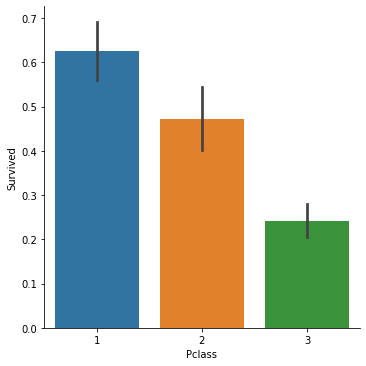

In [67]:
# sns.barplot
sns.catplot(data=titanic_train, x='Pclass', y='Survived', kind='bar')
plt.show()

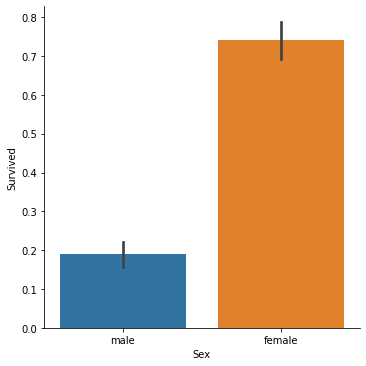

In [68]:
sns.catplot(data=titanic_train, x='Sex', y='Survived', kind='bar')
plt.show()

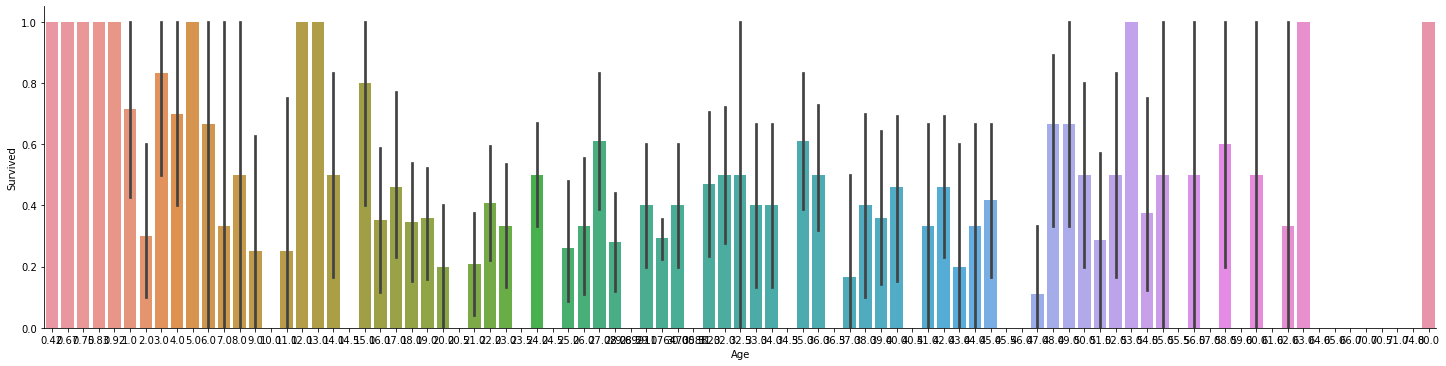

In [94]:
# Age 변수의 값이 다양해서 barplot으로 경향을 찾는 것이 어려움

# titanic_train['Age'].describe()

sns.catplot(ax=ax, data=titanic_train, x='Age', y='Survived', height=5, aspect=4, kind='bar')

# plt.figure(figsize=(20, 5)) # 차트의 크기 조정
# sns.barplot(titanic_train['Age'], titanic_train['Survived'])

plt.show()

In [76]:
# 나이의 범위를 3개로 나누어서 데이터 저장 
age_group = pd.cut(titanic_train['Age'], bins=[0, 15, 50, 200], labels=['child', 'Adult', 'Elder'])
# print(age_group)
titanic_train['AgeGroup'] = age_group
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup
0,0,3,male,22.0,7.2500,S,1,Adult
1,1,1,female,38.0,71.2833,C,1,Adult
2,1,3,female,26.0,7.9250,S,0,Adult
3,1,1,female,35.0,53.1000,S,1,Adult
4,0,3,male,35.0,8.0500,S,0,Adult


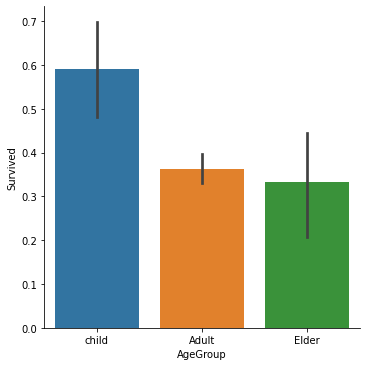

In [77]:
sns.catplot(data=titanic_train, x='AgeGroup', y='Survived', kind='bar')
plt.show()

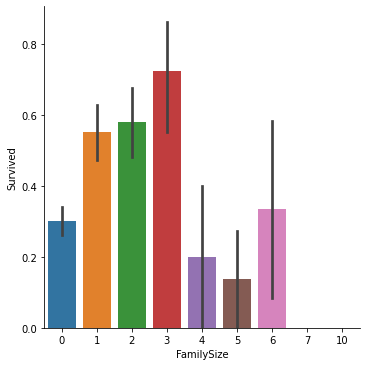

In [78]:
sns.catplot(data=titanic_train, x='FamilySize', y='Survived', kind='bar')
plt.show()

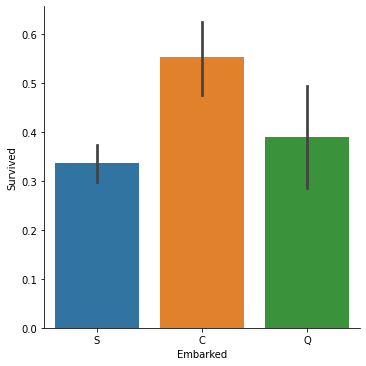

In [79]:
sns.catplot(data=titanic_train, x='Embarked', y='Survived', kind='bar')
plt.show()

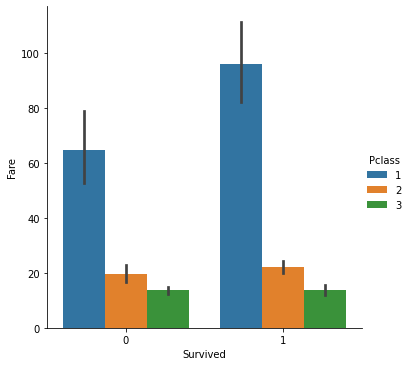

In [82]:
sns.catplot(data=titanic_train, x='Survived', y='Fare', hue='Pclass', kind='bar')
plt.show()

In [85]:
# 요금 범위를 3개로 나누어서 데이터 저장 
fare_group = pd.cut(titanic_train['Fare'], bins=[0, 8, 31, 600], labels=['low', 'middle', 'high'])
# print(fare_group)
titanic_train['FareGroup'] = fare_group
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup,FareGroup
0,0,3,male,22.0,7.2500,S,1,Adult,low
1,1,1,female,38.0,71.2833,C,1,Adult,high
2,1,3,female,26.0,7.9250,S,0,Adult,low
3,1,1,female,35.0,53.1000,S,1,Adult,high
4,0,3,male,35.0,8.0500,S,0,Adult,middle


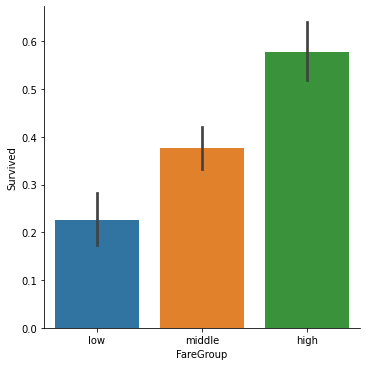

In [86]:
sns.catplot(data=titanic_train, x='FareGroup', y='Survived', kind='bar')
plt.show()

In [101]:
original_titanic_train['Name'].str.extract('([A-Za-z]+)\.') # 'Name' 컬럼 Series의 각 값(문자열 형식)에 extract 함수를 적용하세요

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [102]:
# Name 의 값에서 Title 부분 추출 : Braund, Mr. Owen Harris 에서  Mr 만 추출
original_titanic_train.head(10)
original_titanic_train['Name']
original_titanic_train['Name'].str.extract('([A-Za-z]+)\.')   # ([A-Za-z]+)\. -> 영문자. 형식의 단어 추출
titanic_train['Title'] = original_titanic_train['Name'].str.extract('([A-Za-z]+)\.')

In [103]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup,FareGroup,Title
0,0,3,male,22.0,7.2500,S,1,Adult,low,Mr
1,1,1,female,38.0,71.2833,C,1,Adult,high,Mrs
2,1,3,female,26.0,7.9250,S,0,Adult,low,Miss
3,1,1,female,35.0,53.1000,S,1,Adult,high,Mrs
4,0,3,male,35.0,8.0500,S,0,Adult,middle,Mr


In [109]:
# titanic_train['Title'].value_counts() # 각 값의 발생 빈도 반환
titanic_train['Title'].unique() # unique : 중복을 제거하고 값의 목록을 반환

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [107]:
age_means = titanic_train.groupby('Title')['Age'].mean() # Title로 GroupBy해서 Age의 평균 계산 ( Title 별로 Age 평균 계산 )
age_means

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          40.242731
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       7.086662
Miss        23.260598
Mlle        24.000000
Mme         24.000000
Mr          31.753762
Mrs         34.837782
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [110]:
age_means_dict = age_means.to_dict()
age_means_dict

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 40.242731092436976,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 7.08666176470588,
 'Miss': 23.260597985050364,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 31.753762088974813,
 'Mrs': 34.83778225806451,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [122]:
# map 함수와 dict 전달인자의 역할 확인
# titanic_train['Title']
# titanic_train['Title'].map(age_means_dict)

# titanic_train['Age']가 missing value 였던 행의 index 찾기
row_age_nan = titanic_train['Age'] == original_titanic_train['Age'].mean()
row_age_nan
index_age_nan = titanic_train[row_age_nan].index
index_age_nan

# Age가 missing value였던 행들의 Age 값을 map 함수와 dict를 이용해서 변환
titanic_train.loc[index_age_nan, 'Age'] = titanic_train['Title'].loc[index_age_nan].map(age_means_dict)

In [123]:
titanic_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup,FareGroup,Title
0,0,3,male,22.000000,7.2500,S,1,Adult,low,Mr
1,1,1,female,38.000000,71.2833,C,1,Adult,high,Mrs
2,1,3,female,26.000000,7.9250,S,0,Adult,low,Miss
3,1,1,female,35.000000,53.1000,S,1,Adult,high,Mrs
4,0,3,male,35.000000,8.0500,S,0,Adult,middle,Mr
5,0,3,male,31.753762,8.4583,Q,0,Adult,middle,Mr
6,0,1,male,54.000000,51.8625,S,0,Elder,high,Mr
7,0,3,male,2.000000,21.0750,S,4,child,middle,Master
8,1,3,female,27.000000,11.1333,S,2,Adult,middle,Mrs
9,1,2,female,14.000000,30.0708,C,1,child,middle,Mrs


In [124]:
# missing value여서 평균을 적용한 행에 표시
titanic_train['Imputed'] = 0
titanic_train.loc[index_age_nan, 'Imputed'] = 1
titanic_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,AgeGroup,FareGroup,Title,Imputed
0,0,3,male,22.000000,7.2500,S,1,Adult,low,Mr,0
1,1,1,female,38.000000,71.2833,C,1,Adult,high,Mrs,0
2,1,3,female,26.000000,7.9250,S,0,Adult,low,Miss,0
3,1,1,female,35.000000,53.1000,S,1,Adult,high,Mrs,0
4,0,3,male,35.000000,8.0500,S,0,Adult,middle,Mr,0
5,0,3,male,31.753762,8.4583,Q,0,Adult,middle,Mr,1
6,0,1,male,54.000000,51.8625,S,0,Elder,high,Mr,0
7,0,3,male,2.000000,21.0750,S,4,child,middle,Master,0
8,1,3,female,27.000000,11.1333,S,2,Adult,middle,Mrs,0
9,1,2,female,14.000000,30.0708,C,1,child,middle,Mrs,0
